# Triplet loss 

In [1]:
import os
import sys
import numpy as np
import pandas as pd

sys.path.append('../')

import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# see the projects
!ls ../out/tripletruns -s

total 8
4 exp_net_triplet_simplenet_001
4 exp_triplet_embsimplenet_hinge_adam_mnist_001


In [8]:
PROJECT='../out/tripletruns'
EXPNAME='exp_triplet_embsimplenet_hinge_adam_mnist_001'

pathproject = os.path.join( PROJECT, EXPNAME )
pathprojectlog = os.path.join( PROJECT, EXPNAME, '{}.log'.format(EXPNAME) )

print(pathproject)
print(pathprojectlog)

../out/tripletruns/exp_triplet_embsimplenet_hinge_adam_mnist_001
../out/tripletruns/exp_triplet_embsimplenet_hinge_adam_mnist_001/exp_triplet_embsimplenet_hinge_adam_mnist_001.log


In [17]:
# generate log
!python ../torchlib/tools/parse_log_triplet.py \
../out/tripletruns/exp_triplet_embsimplenet_hinge_adam_mnist_001/exp_triplet_embsimplenet_hinge_adam_mnist_001.log \
../out/tripletruns/exp_triplet_embsimplenet_hinge_adam_mnist_001/

Load:  ../out/tripletruns/exp_triplet_embsimplenet_hinge_adam_mnist_001/exp_triplet_embsimplenet_hinge_adam_mnist_001.log
SAVE:  log_train.csv,  log_val.csv
DONE!!!


In [9]:
filenametrain = os.path.join( pathproject, 'log_{}.csv'.format( 'train' ) )
filenameval = os.path.join( pathproject, 'log_{}.csv'.format( 'val' ) )
print(filenametrain)
print(filenameval)

../out/tripletruns/exp_triplet_embsimplenet_hinge_adam_mnist_001/log_train.csv
../out/tripletruns/exp_triplet_embsimplenet_hinge_adam_mnist_001/log_val.csv


# Train analysis

In [11]:
train = pd.read_csv(filenametrain)
train.head()

,acc,epoch,iter,loss,time,total,type
0,0.5000,0,0,1.2932,6.4039,166,Train
1,0.5549,0,50,1.2289,0.0238,166,Train
2,0.6000,0,100,1.0801,0.0140,166,Train
3,0.6360,0,150,0.9755,0.0136,166,Train
4,0.7167,1,0,0.7675,6.9107,166,Train


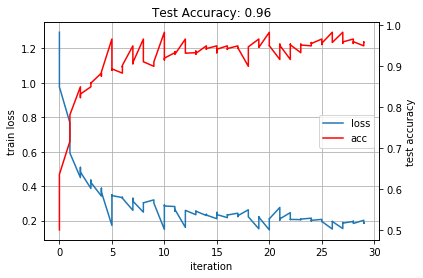

In [13]:

indx   = train['type']
xiter  = np.array(train['iter'])
xacc  = np.array(train['acc'])
xloss  = np.array(train['loss'])
xepoch = np.array(train['epoch'])

#plt.plot( xepoch, xtop1 )
#plt.plot( xepoch, xtop2 )
#plt.plot( xepoch, xloss )
#plt.show()

#plt.style.use('default')
#plt.style.use('classic')
#plt.style.use('ggplot')
#plt.style.use('fivethirtyeight')
#plt.style.use('dark_background')
#plt.style.context('Solarize_Light2')

_, ax1 = plt.subplots()
ax2 = ax1.twinx()
pl1 = ax1.plot(xepoch, xloss, label='loss')
pl2 = ax2.plot(xepoch, xacc, 'r', label='acc')

ax1.set_xlabel('iteration')
ax1.set_ylabel('train loss')
ax2.set_ylabel('test accuracy')
ax2.set_title('Test Accuracy: {:.2f}'.format( xacc[-1] ) )

#ax2.legend(loc='right')
lns = pl1+pl2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc='right')

ax1.grid(True)

